In [27]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('datasets/categorizer_dataset_saved.csv')

In [29]:
df.head()

,Unnamed: 0,text,hate_speech,cyberbullying,crime/threat
0,0,dalits are lowlives,1,0,0
1,1,gay people are a burden to our society,1,0,0
2,2,Arabs are not welcome,1,0,0
3,3,I'm not saying we should actually eliminate he...,1,0,0
4,4,bananas are for black people,1,0,0


In [30]:
df.describe()

,Unnamed: 0,hate_speech,cyberbullying,crime/threat
count,101708.000000,101708.000000,101708.000000,101708.000000
mean,50853.500000,0.538552,0.455490,0.005958
std,29360.714927,0.498514,0.498017,0.076960
min,0.000000,0.000000,0.000000,0.000000
25%,25426.750000,0.000000,0.000000,0.000000
50%,50853.500000,1.000000,0.000000,0.000000
75%,76280.250000,1.000000,1.000000,0.000000
max,101707.000000,1.000000,1.000000,1.000000


In [31]:
df.shape

(101708, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101708 entries, 0 to 101707
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     101708 non-null  int64 
 1   text           101708 non-null  object
 2   hate_speech    101708 non-null  int64 
 3   cyberbullying  101708 non-null  int64 
 4   crime/threat   101708 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.9+ MB


In [33]:
# removing the unnamed extra index column that was formed during the construction of the dataset
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [8]:
df

,text,hate_speech,cyberbullying,crime/threat
0,dalits are lowlives,1,0,0
1,gay people are a burden to our society,1,0,0
2,Arabs are not welcome,1,0,0
3,I'm not saying we should actually eliminate he...,1,0,0
4,bananas are for black people,1,0,0
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I'd ...,1,0,0
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0,0
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0,0
101706,Since 1/3 of all #Islam believes that people w...,1,0,0


In [34]:
df.isnull().sum()

text             0
hate_speech      0
cyberbullying    0
crime/threat     0
dtype: int64

In [35]:
df.dtypes

text             object
hate_speech       int64
cyberbullying     int64
crime/threat      int64
dtype: object

In [36]:
df['text'] = df['text'].astype(str)
for index, row in df.iterrows():
    if type(row['text']) != str:
        print('found non string datatype')
else:
    print('all strings')

all strings


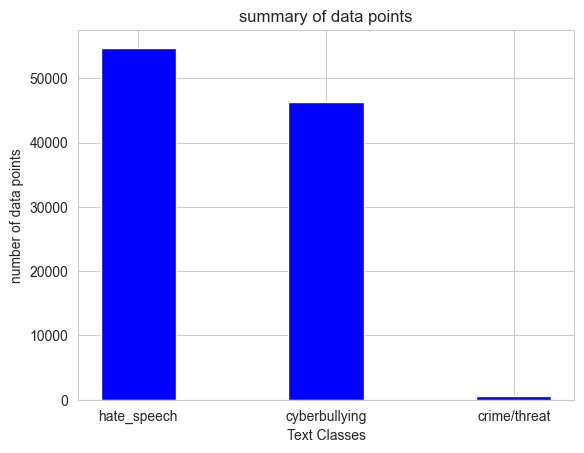

In [37]:
classes = ['hate_speech', 'cyberbullying', 'crime/threat']
values = [df['hate_speech'].sum(), df['cyberbullying'].sum(), df['crime/threat'].sum()]
plt.bar(classes, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Text Classes")
plt.ylabel("number of data points")
plt.title("summary of data points")
plt.show()

not enough values could be found in open source datasets for kill slogans and death threats / criminal activities, hence further stufy on the category of crime/threat will be done in phase 2

<Axes: xlabel='hate_speech', ylabel='count'>

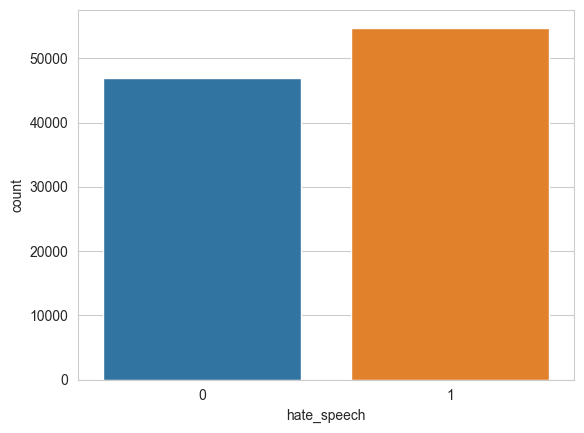

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='hate_speech', data=df)

In [39]:
df['hate_speech'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    53.9%
0    46.1%
Name: hate_speech, dtype: object

<Axes: xlabel='cyberbullying', ylabel='count'>

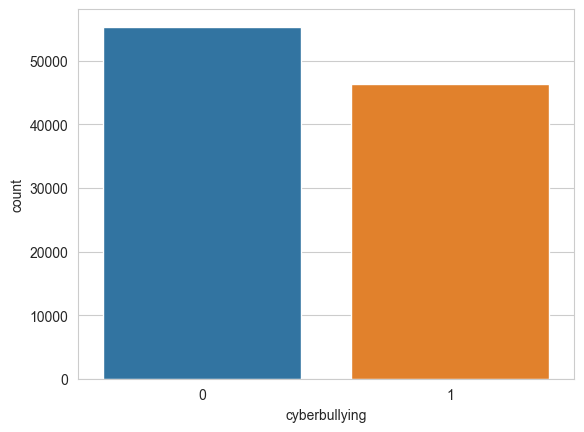

In [40]:
sns.countplot(x='cyberbullying', data=df)

In [41]:
df['cyberbullying'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    54.5%
1    45.5%
Name: cyberbullying, dtype: object

In [42]:
df = df.drop('crime/threat', axis=1)

In [43]:
df

,text,hate_speech,cyberbullying
0,dalits are lowlives,1,0
1,gay people are a burden to our society,1,0
2,Arabs are not welcome,1,0
3,I'm not saying we should actually eliminate he...,1,0
4,bananas are for black people,1,0
...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I'd ...,1,0
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0
101706,Since 1/3 of all #Islam believes that people w...,1,0


In [44]:
#removing contractions
import re
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

#regex to find contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#function to replace contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [45]:
#applying function to the dataframe
df['text']=df['text'].apply(lambda x:expand_contractions(x))

In [46]:
#lowercasing all text for normalization
df['cleaned']=df['text'].apply(lambda x: x.lower())
df

,text,hate_speech,cyberbullying,cleaned
0,dalits are lowlives,1,0,dalits are lowlives
1,gay people are a burden to our society,1,0,gay people are a burden to our society
2,Arabs are not welcome,1,0,arabs are not welcome
3,I am not saying we should actually eliminate h...,1,0,i am not saying we should actually eliminate h...
4,bananas are for black people,1,0,bananas are for black people
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I wo...,1,0,@vandaliser @sajid_fairooz @israeliregime i wo...
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0,@hassanrahman11 @toallahwereturn one christ te...
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0,@dankmtl @aalwuhaib1977 @peacenothate_ no assh...
101706,Since 1/3 of all #Islam believes that people w...,1,0,since 1/3 of all #islam believes that people w...


In [47]:
#now we will remove punctuations
import string
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [48]:
df['cleaned']

0                                       dalits are lowlives
1                    gay people are a burden to our society
2                                     arabs are not welcome
3         i am not saying we should actually eliminate h...
4                              bananas are for black people
                                ...                        
101703    vandaliser sajidfairooz israeliregime i would ...
101704    hassanrahman11 toallahwereturn one christ terr...
101705    dankmtl aalwuhaib1977 peacenothate no asshole ...
101706    since 13 of all islam believes that people who...
101707    sibelo76 yes all that islam is making isis so ...
Name: cleaned, Length: 101708, dtype: object

In [49]:
# replacing all occurrences of escape sequences with blank characters
df['cleaned'] = df['cleaned'].replace({'\n': '', '\r': ''}, regex=True)

In [50]:
df

,text,hate_speech,cyberbullying,cleaned
0,dalits are lowlives,1,0,dalits are lowlives
1,gay people are a burden to our society,1,0,gay people are a burden to our society
2,Arabs are not welcome,1,0,arabs are not welcome
3,I am not saying we should actually eliminate h...,1,0,i am not saying we should actually eliminate h...
4,bananas are for black people,1,0,bananas are for black people
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I wo...,1,0,vandaliser sajidfairooz israeliregime i would ...
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0,hassanrahman11 toallahwereturn one christ terr...
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0,dankmtl aalwuhaib1977 peacenothate no asshole ...
101706,Since 1/3 of all #Islam believes that people w...,1,0,since 13 of all islam believes that people who...


In [51]:
#removing digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [52]:
#removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [53]:
# let us look at our cleaned data now:
for index,text in enumerate(df['cleaned'][350:400]):
  print('Tweet %d:\n'%(index+1),text)

Tweet 1:
 over should not be allowed to drive cars
Tweet 2:
 all spaniards are barbaric
Tweet 3:
 do not marry this lady she is barren
Tweet 4:
 i do not want indians living down my road
Tweet 5:
 do not get me wrong i do not hate curry munchers but i definitely do not like them
Tweet 6:
 it could be worse you could be a pakistani
Tweet 7:
 transsexuals like to fiddle with kids
Tweet 8:
 women should be gassed
Tweet 9:
 muslims are 
Tweet 10:
 african americans are monkeys
Tweet 11:
 if you marry a barren lady you will live all your life with no kids and this is unfair for yourself
Tweet 12:
 those black men look alike this black duck
Tweet 13:
 gays are lower mammels
Tweet 14:
 they come to the uk because they say they cant get a job in theirs doubt that
Tweet 15:
 you have a so you are a guy
Tweet 16:
 i hate letter boxes and i am not talking about mail
Tweet 17:
 refugees are disgusting
Tweet 18:
 i feel like all women should go to hell
Tweet 19:
 i do not like 
Tweet 20:
 this coun

In [55]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
stop_words = stopwords.words('english')
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [57]:
df

,text,hate_speech,cyberbullying,cleaned
0,dalits are lowlives,1,0,dalits lowlives
1,gay people are a burden to our society,1,0,gay people burden society
2,Arabs are not welcome,1,0,arabs welcome
3,I am not saying we should actually eliminate h...,1,0,saying actually eliminate heebs wish naturally...
4,bananas are for black people,1,0,bananas black people
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I wo...,1,0,vandaliser sajidfairooz israeliregime would ra...
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0,toallahwereturn one christ terror group longer...
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0,dankmtl peacenothate asshole israelis defending
101706,Since 1/3 of all #Islam believes that people w...,1,0,since islam believes people leave religion mur...


In [58]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(words)

In [60]:
df['cleaned'] = df['cleaned'].apply(lemmatize_words)

In [61]:
df

,text,hate_speech,cyberbullying,cleaned
0,dalits are lowlives,1,0,dalits lowlives
1,gay people are a burden to our society,1,0,gay people burden society
2,Arabs are not welcome,1,0,arabs welcome
3,I am not saying we should actually eliminate h...,1,0,say actually eliminate heebs wish naturally be...
4,bananas are for black people,1,0,bananas black people
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I wo...,1,0,vandaliser sajidfairooz israeliregime would ra...
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,1,0,toallahwereturn one christ terror group longer...
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,1,0,dankmtl peacenothate asshole israelis defend
101706,Since 1/3 of all #Islam believes that people w...,1,0,since islam believe people leave religion murd...


In [62]:
df = df.iloc[:,[0,3,1,2]]
df

,text,cleaned,hate_speech,cyberbullying
0,dalits are lowlives,dalits lowlives,1,0
1,gay people are a burden to our society,gay people burden society,1,0
2,Arabs are not welcome,arabs welcome,1,0
3,I am not saying we should actually eliminate h...,say actually eliminate heebs wish naturally be...,1,0
4,bananas are for black people,bananas black people,1,0
...,...,...,...,...
101703,@Vandaliser @sajid_fairooz @IsraeliRegime I wo...,vandaliser sajidfairooz israeliregime would ra...,1,0
101704,@hassanrahman11 @ToAllahWeReturn One Christ te...,toallahwereturn one christ terror group longer...,1,0
101705,@dankmtl @AAlwuhaib1977 @PeaceNotHate_ No assh...,dankmtl peacenothate asshole israelis defend,1,0
101706,Since 1/3 of all #Islam believes that people w...,since islam believe people leave religion murd...,1,0


In [63]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS

In [69]:
stopwords = set(STOPWORDS)
comment_words = ''
for line in df['cleaned']:
    val = str(line)
    # split the value
    tokens = val.split()
    comment_words += " ".join(tokens)+" "

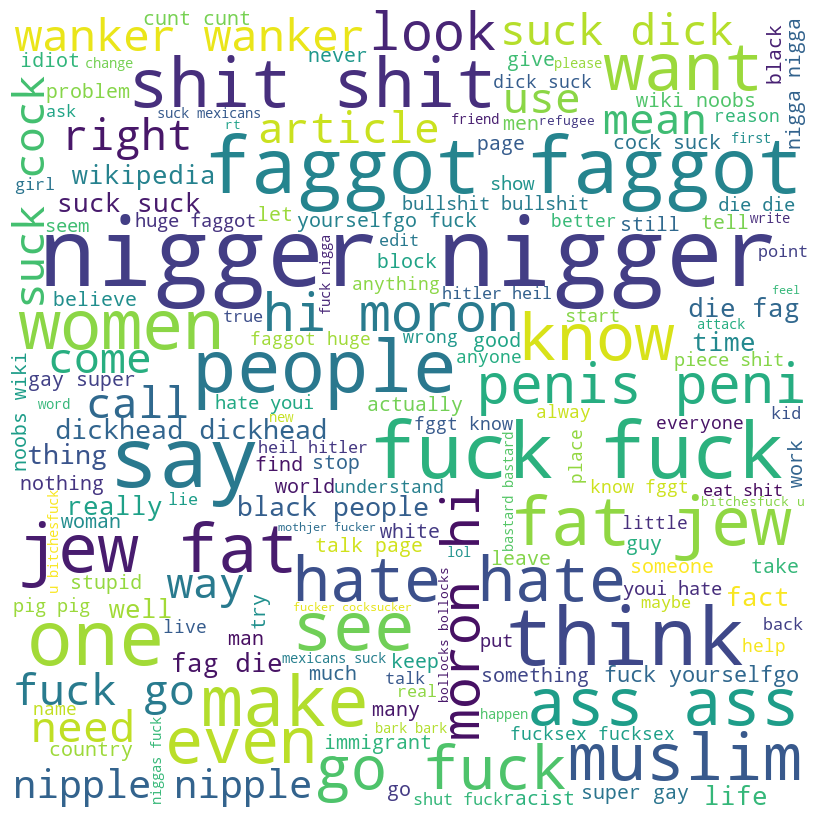

In [70]:
WC = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size =10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(WC)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [66]:
df.reset_index(inplace=True, drop=True)

In [67]:
df = df.drop('text', axis=1)
df

,cleaned,hate_speech,cyberbullying
0,dalits lowlives,1,0
1,gay people burden society,1,0
2,arabs welcome,1,0
3,say actually eliminate heebs wish naturally be...,1,0
4,bananas black people,1,0
...,...,...,...
101703,vandaliser sajidfairooz israeliregime would ra...,1,0
101704,toallahwereturn one christ terror group longer...,1,0
101705,dankmtl peacenothate asshole israelis defend,1,0
101706,since islam believe people leave religion murd...,1,0


In [68]:
df.to_csv('datasets/categorizer_cleaned.csv')